In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import initializers

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('diabetes_skripsi.csv')
df.head()

,puskesmas,kelurahan,umur,jk,merokok,aktivitas_fisik,konsumsi_alkohol,tekanan_darah,bmi,lingkar_perut,pemeriksaan_gula,latitude,longitude,diagnosis
0,Bogor Selatan,Pamoyanan,48,0,0,0,0,70,18.73,85.0,197,-6.640877,106.793165,1
1,Bogor Selatan,Pamoyanan,75,0,0,0,0,70,21.64,80.0,155,-6.640877,106.793165,1
2,Bogor Selatan,Pamoyanan,67,0,0,1,0,70,27.68,84.0,180,-6.640877,106.793165,1
3,Bogor Selatan,Ranggamekar,42,0,0,0,0,88,31.59,93.5,210,-6.624390,106.791912,1
4,Bogor Selatan,Ranggamekar,45,0,0,0,0,80,20.94,90.0,240,-6.624390,106.791912,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   puskesmas         2091 non-null   object 
 1   kelurahan         2091 non-null   object 
 2   umur              2091 non-null   int64  
 3   jk                2091 non-null   int64  
 4   merokok           2091 non-null   int64  
 5   aktivitas_fisik   2091 non-null   int64  
 6   konsumsi_alkohol  2091 non-null   int64  
 7   tekanan_darah     2091 non-null   int64  
 8   bmi               2091 non-null   float64
 9   lingkar_perut     2091 non-null   float64
 10  pemeriksaan_gula  2091 non-null   int64  
 11  latitude          2091 non-null   float64
 12  longitude         2091 non-null   float64
 13  diagnosis         2091 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 228.8+ KB


In [4]:
# Delete columns 'puskesmas', 'kelurahan', 'longitude', and 'latitude'
df = df.drop(['puskesmas', 'kelurahan', 'longitude', 'latitude'], axis=1)

In [5]:
df.describe()

,umur,jk,merokok,aktivitas_fisik,konsumsi_alkohol,tekanan_darah,bmi,lingkar_perut,pemeriksaan_gula,diagnosis
count,2091.000000,2091.000000,2091.000000,2091.000000,2091.0,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000
mean,54.199904,0.497848,0.345768,0.499283,0.0,80.909134,24.111100,84.659493,168.157819,0.609278
std,12.541766,0.500115,0.475732,0.500119,0.0,10.892883,4.574302,10.876317,72.334278,0.488029
min,16.000000,0.000000,0.000000,0.000000,0.0,31.000000,0.210000,0.000000,48.000000,0.000000
25%,47.000000,0.000000,0.000000,0.000000,0.0,70.000000,21.370000,79.000000,109.000000,0.000000
50%,55.000000,0.000000,0.000000,0.000000,0.0,80.000000,23.310000,85.000000,150.000000,1.000000
75%,63.000000,1.000000,1.000000,1.000000,0.0,88.000000,26.040000,90.000000,219.000000,1.000000
max,92.000000,1.000000,1.000000,1.000000,0.0,190.000000,81.300000,250.000000,567.000000,1.000000


In [6]:
# Define features (X) and target (y)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [7]:
print(X)
print(y)

      umur  jk  merokok  aktivitas_fisik  konsumsi_alkohol  tekanan_darah  \
0       48   0        0                0                 0             70   
1       75   0        0                0                 0             70   
2       67   0        0                1                 0             70   
3       42   0        0                0                 0             88   
4       45   0        0                0                 0             80   
...    ...  ..      ...              ...               ...            ...   
2086    66   1        0                0                 0             70   
2087    75   1        0                0                 0             90   
2088    47   1        0                0                 0             80   
2089    61   1        0                0                 0             80   
2090    55   0        0                0                 0             80   

        bmi  lingkar_perut  pemeriksaan_gula  
0     18.73           85.0  

In [8]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.42105263 0.         0.         ... 0.22838821 0.34       0.28709056]
 [0.77631579 0.         0.         ... 0.26427426 0.32       0.2061657 ]
 [0.67105263 0.         0.         ... 0.3387594  0.336      0.25433526]
 ...
 [0.40789474 1.         0.         ... 0.27142681 0.32       0.22350674]
 [0.59210526 1.         0.         ... 0.41312122 0.408      0.20038536]
 [0.51315789 0.         0.         ... 0.30546307 0.368      0.14258189]]


In [9]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

In [10]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote,
                                                    y_smote,
                                                    test_size=0.1,
                                                    random_state=42)

In [11]:
# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [12]:
# Inisiasi Hyperparameter
num_neuron = 50
num_epoch = 50
num_batch = 32
optimizer = Adam(learning_rate=0.001)

# Membuat model Sequential
model = Sequential()

# Lapisan LSTM pertama
model.add(LSTM(num_neuron, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])))

# Lapisan LSTM kedua
model.add(LSTM(num_neuron, activation='relu', return_sequences=False))  # return_sequences=False karena lapisan ini terakhir

# Lapisan Output (misalnya untuk klasifikasi biner, gunakan 1 neuron dengan aktivasi sigmoid)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melihat ringkasan model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=num_epoch, batch_size=num_batch, validation_split=0.2, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             12000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 32251 (125.98 KB)
Trainable params: 32251 (125.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
58/58 [==============================] - 12s 42ms/step - loss: 0.6904 - accuracy: 0.6210 - val_loss: 0.6842 - val_accuracy: 0.7320
Epoch 2/50
58/58 [==============================] - 1s 13ms/step - loss: 0.6686 - accuracy: 0.6865 - val_loss: 0.6329 - val_accuracy: 0.7211

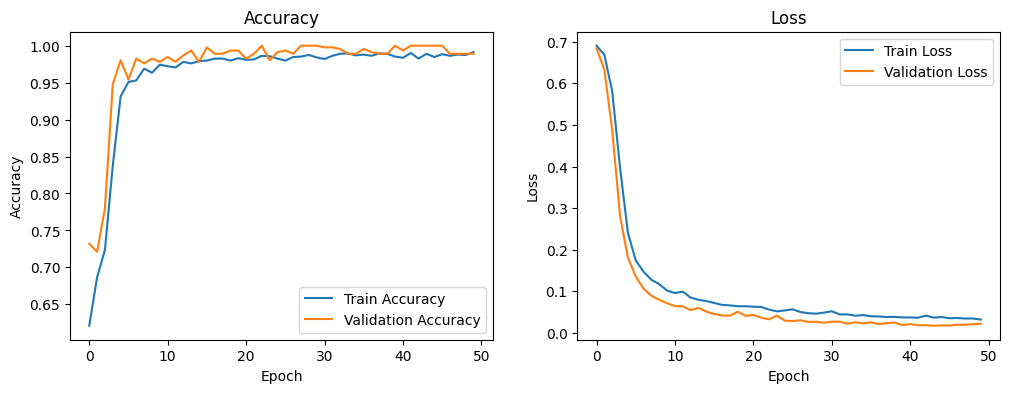

In [13]:
# Plot accuracy dan loss

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9803921580314636


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Setelah model dilatih, kita lakukan prediksi pada test set
y_pred_prob = model.predict(X_test)

# Konversi prediksi probabilitas menjadi nilai kelas biner (0 atau 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Hitung MAE, RMSE, dan MAPE berdasarkan probabilitas prediksi
mae = mean_absolute_error(y_test, y_pred_prob)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_prob))


# Print hasil evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

8/8 [==============================] - 1s 9ms/step
Mean Absolute Error (MAE): 0.024469114619246512
Root Mean Squared Error (RMSE): 0.10957342981071774


In [16]:
# Buat tabel perbandingan antara data aktual dan prediksi
comparison_df = pd.DataFrame({
    'Data Aktual': y_test.values,  # Mengambil nilai sebagai array NumPy
    'Prediksi': y_pred.flatten(),  # Jika y_pred adalah NumPy array
    'Probabilitas Prediksi': y_pred_prob.flatten()  # Jika y_pred_prob adalah NumPy array
})

comparison_df

,Data Aktual,Prediksi,Probabilitas Prediksi
0,1,1,1.000000e+00
1,1,1,9.991630e-01
2,0,0,4.638685e-04
3,1,1,1.000000e+00
4,1,1,1.000000e+00
...,...,...,...
250,0,0,1.526389e-02
251,0,0,9.063344e-07
252,1,1,1.000000e+00
253,0,0,9.038919e-05


Confusion Matrix:
[[132   0]
 [  5 118]]


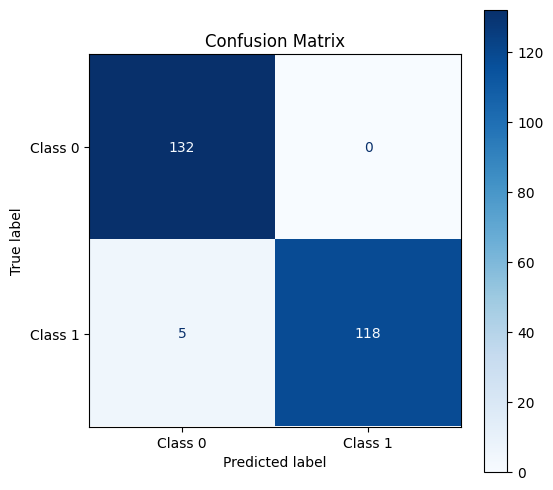

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', ax=ax, colorbar=True)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Misalkan data baru dalam bentuk array atau dataframe
new_data = np.array([[39, 1, 0, 0, 0, 92, 23.07, 90, 106]])

# Scale data baru dengan scaler yang sama yang digunakan pada data pelatihan
new_data_scaled = scaler.transform(new_data)

# Reshape data baru untuk menyesuaikan input LSTM (samples, timesteps, features)
new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Prediksi probabilitas diabetes dengan model yang sudah dilatih
new_prediction_prob = model.predict(new_data_scaled)

# Konversi probabilitas ke prediksi kelas (0 atau 1)
new_prediction_class = (new_prediction_prob > 0.5).astype("int32")

# Tampilkan hasil prediksi
print(f"Probabilitas Diabetes: {new_prediction_prob[0][0] * 100:.2f}%")
print(f"Prediksi Kelas: {new_prediction_class[0][0]}")  # 1: Diabetes, 0: Non-Diabetes